|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [1]:
# write your code here ^_^
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

# Q2: Read instagram_users.csv file

In [2]:
# write your code here ^_^
df = pd.read_csv('instagram_users.csv')

# Q3: Split tha dataset into training and testing

In [3]:
# write your code here ^_^
x = df.drop('real_fake',axis=1)
y = df['real_fake']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40,random_state=42)

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [31]:
print('model name: decisionTree classifier')

model name: decisionTree classifier


In [30]:
# write your code here ^_^
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

In [29]:
dtree.fit(X_train,y_train) # model's name

DecisionTreeClassifier()

In [28]:
predictions = dtree.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print(classification_report(y_test,predictions)) #model performance

              precision    recall  f1-score   support

        fake       0.85      0.86      0.85     12691
        real       0.86      0.86      0.86     13007

    accuracy                           0.86     25698
   macro avg       0.86      0.86      0.86     25698
weighted avg       0.86      0.86      0.86     25698



In [33]:
print('model accuracy : \n')
print(accuracy_score(y_test,predictions))

model accuracy : 

0.8556307883882014


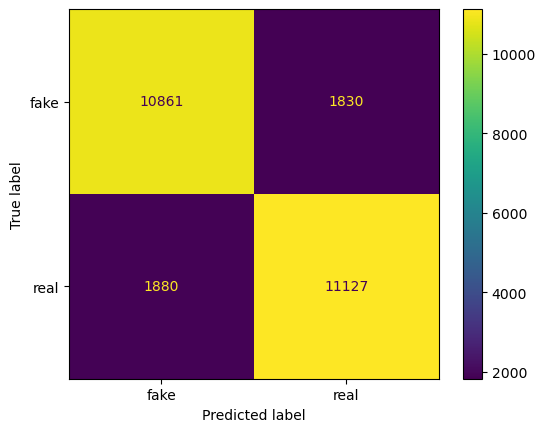

In [25]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtree, X_test, y_test)  
plt.show()

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [24]:
print('model name : random forest classifier')

model name : random forest classifier


In [10]:
# write your code here ^_^
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100) #n_estimators: The number of trees in the forest.
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
rfc_pred = rfc.predict(X_test)


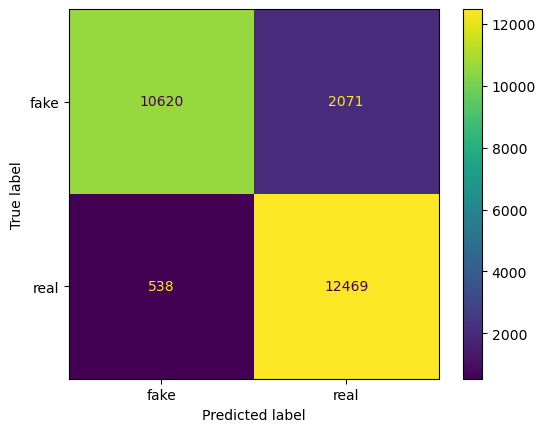

In [12]:
plot_confusion_matrix(rfc, X_test, y_test)  
plt.show()

In [13]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

        fake       0.95      0.84      0.89     12691
        real       0.86      0.96      0.91     13007

    accuracy                           0.90     25698
   macro avg       0.90      0.90      0.90     25698
weighted avg       0.90      0.90      0.90     25698



In [34]:
print('model accuracy : \n')
print(accuracy_score(y_test,rfc_pred))

model accuracy : 

0.8984745894622149


## Q4.3: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [15]:
print('Model name :','SVC')

Model name : SVC


In [18]:
# write your code here ^_^
from sklearn.svm import SVC

svc = SVC(random_state=34)
svc.fit(X_train, y_train)


SVC(random_state=34)

In [36]:
print('model accuracy : \n')
print(accuracy_score(y_test,svc.predict(X_test)))

model accuracy : 

0.6856564713207254


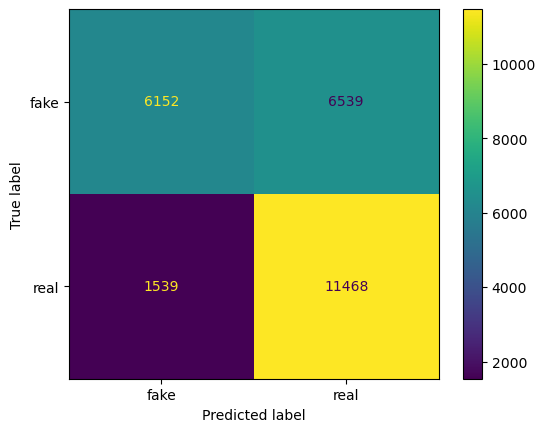

In [20]:
plot_confusion_matrix(svc, X_test, y_test)  
plt.show()